In [1]:
# !pip install opencv-python

## [1] openCv로 이미지 읽기 및 waitKey에 대한 이해

In [2]:
import glob
glob.glob('*.jpg')

['dog.jpg', 'image_m.jpg', 'img01.jpg', 'img02.jpg', 'sample.jpg']

In [3]:
from time import ctime
import time
timeNow = ctime(time.time())
timeNow


'Mon Jul 10 11:23:16 2023'

In [4]:
## 화면출력물보기
import cv2

# 폰트 색상 지정
blue = (255, 0, 0)
green= (0, 255, 0)
red= (0, 0, 255)
white= (255, 255, 255) 

# 폰트 지정
font =  cv2.FONT_HERSHEY_PLAIN

img_color=cv2.imread('sample.jpg', cv2.IMREAD_COLOR)  
img_color[0], img_color.shape

# 이미지에 글자 합성하기
img = cv2.putText(img_color, timeNow, (350, 40), font, 2, blue, 1, cv2.LINE_8)

cv2.imshow('color img',img)
cv2.waitKey(0)  # 사용자가 화면을 닫을때까지 열려있음, 함수 매개 변수로 넣는 키 입력 대기 시간은 ms 단위이고 0이면 무한대기이다.
#cv2.destroyAllwindows() - 파이참에서 필요

-1

In [7]:
import cv2
img_color=cv2.imread('sample.jpg', cv2.IMREAD_COLOR)  
img_color[0], img_color.shape

cv2.imshow('color img',img_color)
inputKeyValue=cv2.waitKey(0)  # 사용자가 화면을 닫을때까지 열려있음, 함수 매개 변수로 넣는 키 입력 대기 시간은 ms 단위이고 0이면 무한대기이다.
if inputKeyValue==ord('a'):
    print('a키를 눌렀네요..')
print(inputKeyValue)


a키를 눌렀네요..
97


: 

In [22]:
##  좌표이동 https://diytube.tistory.com/21
x, y = 200, 200
title = 'KeyBoard Control'
img=img_color.copy()

while True:
    cv2.imshow(title, img)
    cv2.moveWindow(title, x, y)
    key = cv2.waitKey(0) & 0xFF # 키보드 입력 대기, 8비트 마스크 처리
    print(key, chr(key))        # 키보드 입력 값, 문자 값 출력
    if key == ord('a'):
        x -= 10                 # a가 입력되면 왼쪽으로 이동
    
    elif key == ord('s'):
        y += 10                 # s가 입력되면 아래로 이동
    
    elif key == ord('w'):
        y -= 10                 # d가 입력되면 위로 이동
        
    elif key == ord('d'):
        x += 10                 # w가 입력되면 오른쪽으로 이동
        
    elif key == ord('c'):
        cv2.putText(img_color, timeNow, (350, 40), font, 2, blue, 1, cv2.LINE_8)
    
    elif key == ord('q') or key == 27:
        break                   # q이거나 esc이면 종료.
        cv2.destroyAllwindows()
    cv2.moveWindow(title, x, y) # 새로운 좌표로 창 이동


99 c


error: OpenCV(4.8.0) :-1: error: (-5:Bad argument) in function 'putText'
> Overload resolution failed:
>  - Can't convert object to 'str' for 'text'
>  - Can't convert object to 'str' for 'text'


: 

In [11]:
### 효과지정_ 흑백으로 출력하기
## https://076923.github.io/posts/Python-opencv-1/

import cv2
img=cv2.imread('sample.jpg', cv2.IMREAD_COLOR)  

gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
ret,dst = cv2.threshold(gray, 100, 255, cv2.THRESH_BINARY)
cv2.imshow('sample',dst)
cv2.waitKey(0)

-1

## [2] 읽기 옵션
- RGB, 그레이, 4채널값 유지하면서 읽기

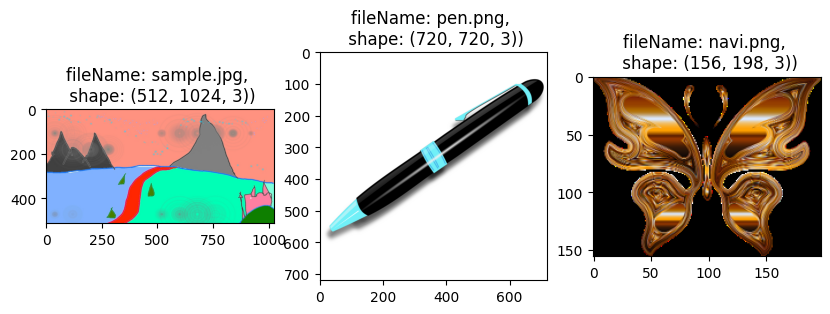

In [41]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

imgList=['sample.jpg','pen.png','navi.png']

plt.figure(figsize=(10,3))
for cnt,file in enumerate(imgList):
    img=cv2.imread(file, cv2.IMREAD_COLOR)
    plt.subplot(1,len(imgList),cnt+1)
    plt.imshow(img)
    plt.title('fileName: {0}, \n shape: {1})'.format(file,np.shape(img)))


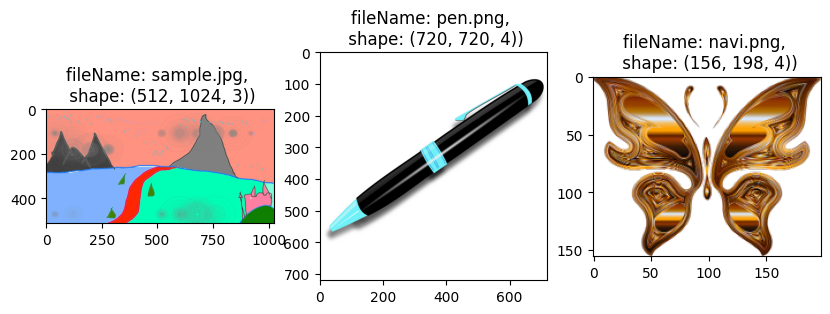

In [50]:
### 함수 제작
import cv2
import matplotlib.pyplot as plt
import numpy as np

def imgRead(file,option=cv2.IMREAD_COLOR): #option=1
    img=cv2.imread(file,option)
    return img

def chart(imgList,option):
    plt.figure(figsize=(10,3))
    for cnt,file in enumerate(imgList):
        img=imgRead(file,option)
        plt.subplot(1,len(imgList),cnt+1)
        plt.imshow(img)
        plt.title('fileName: {0}, \n shape: {1})'.format(file,np.shape(img)))
        
imgList=['sample.jpg','pen.png','navi.png']       
chart(imgList,-1)

## [3] BGR을 RGB로 변환

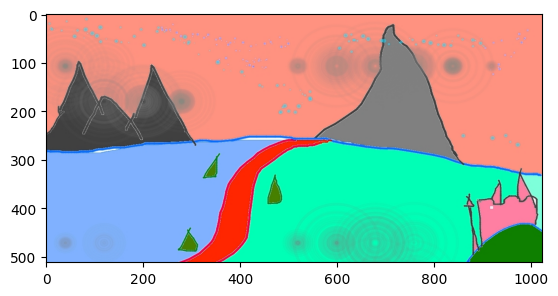

In [52]:
img=cv2.imread('sample.jpg')
plt.imshow(img)

In [61]:
from PIL import Image
img=Image.open('sample.jpg')
print('\n---PILLOW로 open하여 array한 자료임----------------')
print(np.array(img)[0][0])     # RGB로 읽힘



print('\n------------cv2로 읽은 자료임----------------')
import cv2
img=cv2.imread('sample.jpg')   # BGR로 읽힘
print(img[0][0])


print('\n------------cv2의 RGB로 변환하기----------------')
import cv2
img=cv2.imread('sample.jpg')   # BGR로 읽힘
img=cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # RGB로 변환
print(img[0][0])






---PILLOW로 open하여 array한 자료임----------------
[128 146 255]

------------cv2로 읽은 자료임----------------
[255 146 128]

------------cv2의 RGB로 변환하기----------------
[128 146 255]


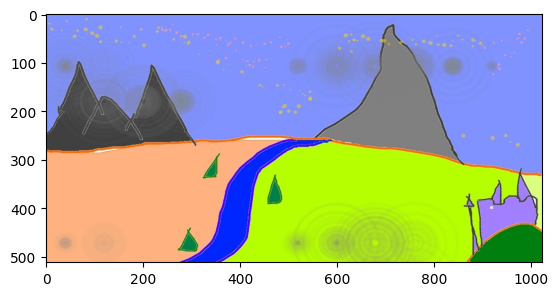

In [69]:
### swap를 이용한 bgr를 rgb로 변경
img=cv2.imread('sample.jpg')   # BGR로 읽힘

class my():
    def BgrRGB(img):
        tmp=img.copy() 
        img[:,:,0]=tmp[:,:,2]
        img[:,:,2]=tmp[:,:,0]
        
        return img

img=my.BgrRGB(img)

plt.imshow(img)


## [4] 이미지의 관심영역(ROI)에 대한 처리
- 이미지 내에서 관심 영역(Region of Interest, ROI)


In [6]:
import matplotlib.pyplot as plt

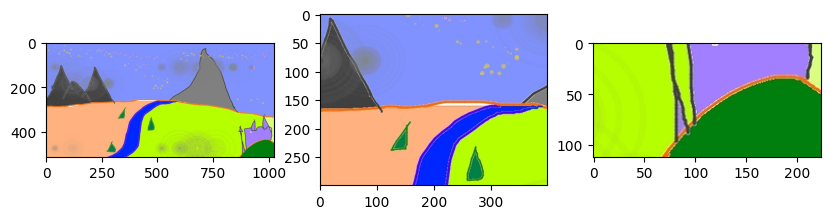

In [7]:
img=cv2.imread('sample.jpg',cv2.IMREAD_COLOR)   # rgb 3채널로 읽음
img=cv2.cvtColor(img, cv2.COLOR_BGR2RGB)    # plt.imshow로 보기 위하여서 bgr를 rgb로 변환


plt.figure(figsize=(10,3))
plt.subplot(1,3,1)
plt.imshow(img)

plt.subplot(1,3,2)
roi=img[100:400, 200:600]
plt.imshow(roi)

plt.subplot(1,3,3)
roi=img[400:, 800:]
plt.imshow(roi)


#####  [4-1] 이미지의 일정 영역 검정색으로

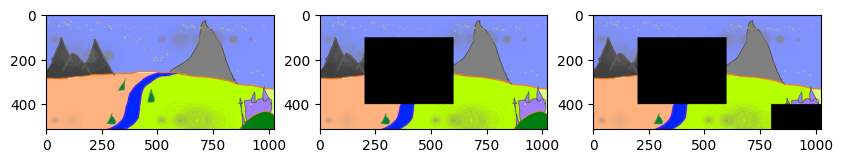

In [8]:
img=cv2.imread('sample.jpg',cv2.IMREAD_COLOR)   # rgb 3채널로 읽음
img=cv2.cvtColor(img, cv2.COLOR_BGR2RGB)    # plt.imshow로 보기 위하여서 bgr를 rgb로 변환


plt.figure(figsize=(10,3))
plt.subplot(1,3,1)
plt.imshow(img)

plt.subplot(1,3,2)
roi=img[100:400, 200:600]
img[100:400,200:600]=0
plt.imshow(img)

plt.subplot(1,3,3)
roi=img[400:, 800:]
img[400:,800:]=0
plt.imshow(img)


#####  [4-2] 다른 이미지 넣기

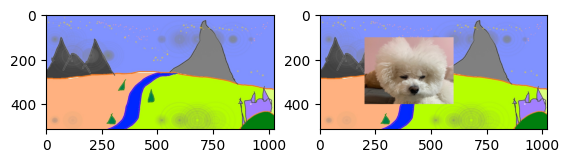

In [9]:
img=cv2.imread('sample.jpg',cv2.IMREAD_COLOR)   # rgb 3채널로 읽음
img=cv2.cvtColor(img, cv2.COLOR_BGR2RGB)    # plt.imshow로 보기 위하여서 bgr를 rgb로 변환
dog=cv2.imread('dog.jpg', cv2.IMREAD_COLOR)
dog=cv2.cvtColor(dog, cv2.COLOR_BGR2RGB) 
dog=cv2.resize(dog, (600-200,400-100))


plt.figure(figsize=(10,3))
plt.subplot(1,3,1)
plt.imshow(img)

plt.subplot(1,3,2)
roi=img[100:400, 200:600]
img[100:400,200:600]=dog
plt.imshow(img)


##### [4-3] 이미지의 일정영역에 사진효과넣기()
- 사진의 일정영역을 잘라낸뒤 
- 잘라낸 사진에 효과(블러,모자이크등)를 주고
- 그 사진을 다시 원래이미지에 위치하게 함

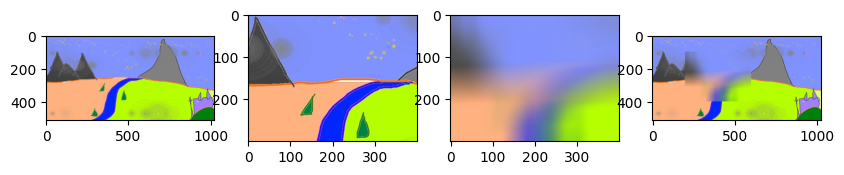

In [89]:
img=cv2.imread('sample.jpg',cv2.IMREAD_COLOR)   # rgb 3채널로 읽음
img=cv2.cvtColor(img, cv2.COLOR_BGR2RGB)    # plt.imshow로 보기 위하여서 bgr를 rgb로 변환

plt.figure(figsize=(10,3))
plt.subplot(1,4,1)
plt.imshow(img)


plt.subplot(1,4,2)
roi=img[100:400, 200:600]
plt.imshow(roi)

roi = cv2.blur(roi, (90, 90), anchor=(-1, -1), borderType=cv2.BORDER_DEFAULT)
plt.subplot(1,4,3)
plt.imshow(roi)

img[100:400, 200:600]=roi
plt.subplot(1,4,4)
plt.imshow(img)





#### [4-4]이미지를 다각형 영역으로 작업하기
- 다각형은  각점(행,열 위치), 각점....을 연결하는 도형을 의미함.

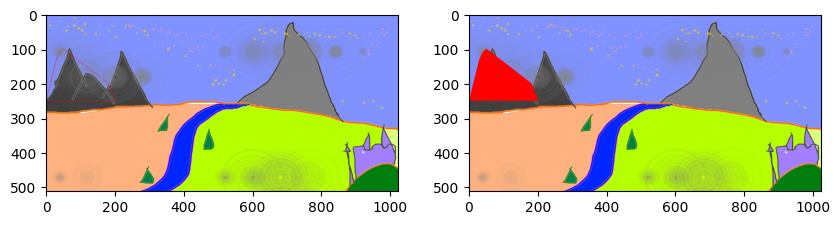

In [105]:
img=cv2.imread('sample.jpg',cv2.IMREAD_COLOR)   # rgb 3채널로 읽음
img=cv2.cvtColor(img, cv2.COLOR_BGR2RGB)    # plt.
point=np.array([[50,100],[40,110],[30,130],[0,250],[200,250],[180,200],[50,100]], np.int32)

plt.figure(figsize=(10,3))
plt.subplot(1,2,1)
aa=cv2.polylines(img,[point],True, (255,0,0))
plt.imshow(aa)

plt.subplot(1,2,2)
aa=cv2.fillConvexPoly(img,point,(255,0,0))
plt.imshow(aa)




## [5] 마우스 클릭 이벤트

In [5]:
import cv2

def drawRectangle(action, x, y, flags, parms):
    global top_left_corner, bottom_right_corner
    if action == cv2.EVENT_LBUTTONDOWN:
        top_left_corner = [(x, y)]
    elif action == cv2.EVENT_LBUTTONUP:
        bottom_right_corner = [(x, y)]
    cv2.rectangle(img, top_left_corner[0], bottom_right_corner[0], (0, 255, 0),5)
    cv2.imshow("Window", img)
    cv2.waitKey(0)

img=cv2.imread('sample.jpg',cv2.IMREAD_COLOR)   # rgb 3채널로 읽음   
cv2.namedWindow("Window")
cv2.setMouseCallback("Window", drawRectangle)


: 

### 참고: ASCII코드
- charList='a A b B d e'.split(' ')

- for i in charList:
-    print('[char] {0} --> asciicode {1}'.format(i,ord(i)))
    
- print('-'*50)
- for i in range(65,70):
    print('[ascii] {0} --> char {1}'.format(i,chr(i)))

In [19]:
charList='a A b B d e'.split(' ')

for i in charList:
    print('[char] {0} --> asciicode {1}'.format(i,ord(i)))
    
print('-'*50)
for i in range(65,70):
    print('[ascii] {0} --> char {1}'.format(i,chr(i)))

[char] a --> asciicode 97
[char] A --> asciicode 65
[char] b --> asciicode 98
[char] B --> asciicode 66
[char] d --> asciicode 100
[char] e --> asciicode 101
--------------------------------------------------
[ascii] 65 --> char A
[ascii] 66 --> char B
[ascii] 67 --> char C
[ascii] 68 --> char D
[ascii] 69 --> char E
